In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [2]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(0, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

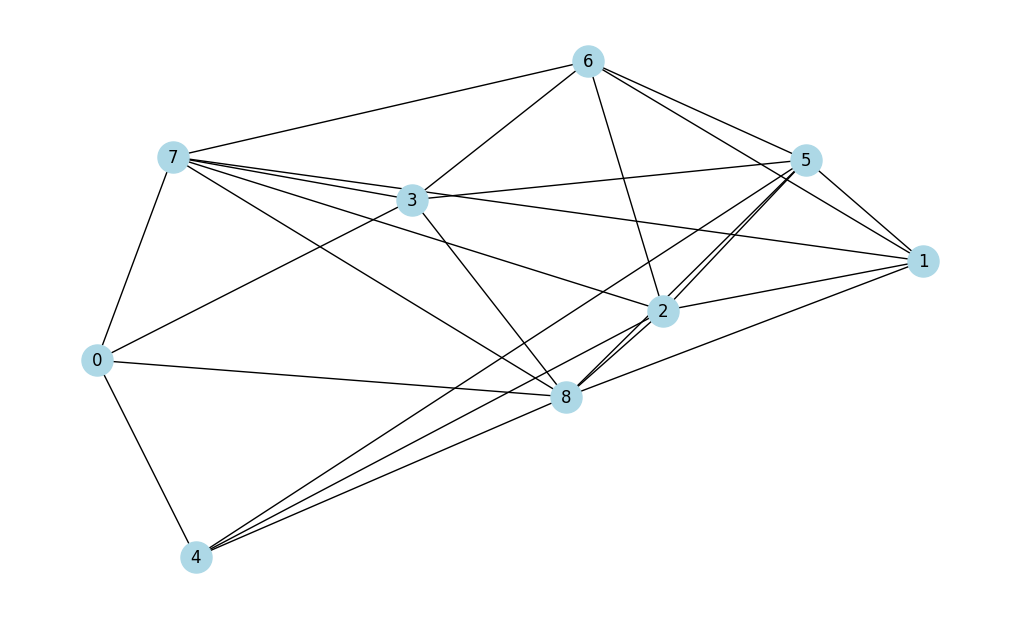

In [4]:
G = gnp_random_connected_graph(9, 0.5, False, True)

# For Task 1

## Kruskal's algorithm

In [5]:
from networkx.algorithms import tree

In [6]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

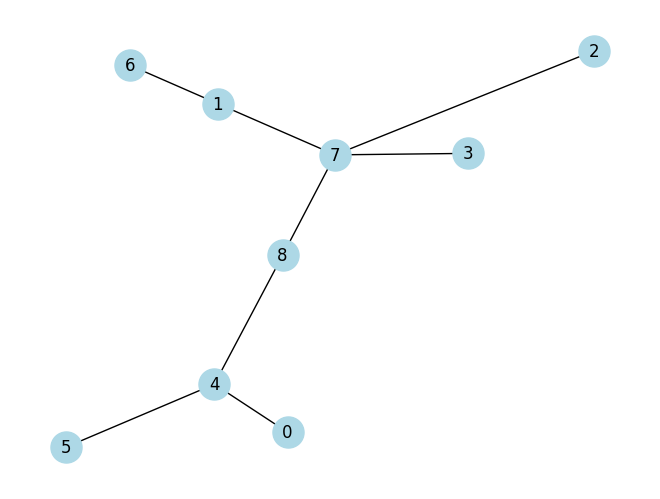

In [7]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [8]:
mstk.edges(), len(mstk.edges())

(EdgeView([(0, 4), (1, 7), (1, 6), (2, 7), (3, 7), (4, 8), (4, 5), (7, 8)]), 8)

## Prim's algorithm

In [9]:
mstp = tree.minimum_spanning_tree(G, algorithm="prim")
print(list(mstp))

[0, 1, 2, 3, 4, 5, 6, 7, 8]


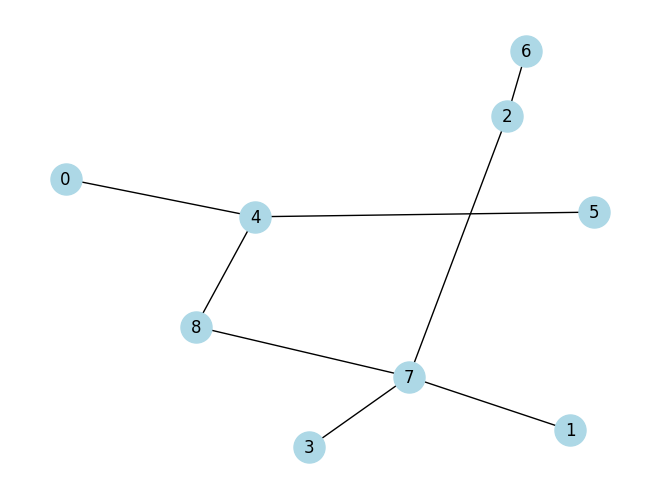

In [10]:
nx.draw(mstp, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [11]:
mstp.edges(), len(mstp.edges())

(EdgeView([(0, 4), (1, 7), (2, 7), (2, 6), (3, 7), (4, 8), (4, 5), (7, 8)]), 8)

In [12]:
list(G.edges(data=True))

[(0, 4, {'weight': 7}),
 (0, 3, {'weight': 10}),
 (0, 7, {'weight': 19}),
 (0, 8, {'weight': 20}),
 (1, 5, {'weight': 14}),
 (1, 2, {'weight': 20}),
 (1, 6, {'weight': 11}),
 (1, 7, {'weight': 8}),
 (1, 8, {'weight': 17}),
 (2, 8, {'weight': 9}),
 (2, 4, {'weight': 8}),
 (2, 5, {'weight': 11}),
 (2, 6, {'weight': 11}),
 (2, 7, {'weight': 1}),
 (3, 5, {'weight': 15}),
 (3, 6, {'weight': 14}),
 (3, 7, {'weight': 8}),
 (3, 8, {'weight': 16}),
 (4, 5, {'weight': 3}),
 (4, 8, {'weight': 2}),
 (5, 6, {'weight': 18}),
 (5, 8, {'weight': 8}),
 (6, 7, {'weight': 19}),
 (7, 8, {'weight': 4})]

# For Task 2

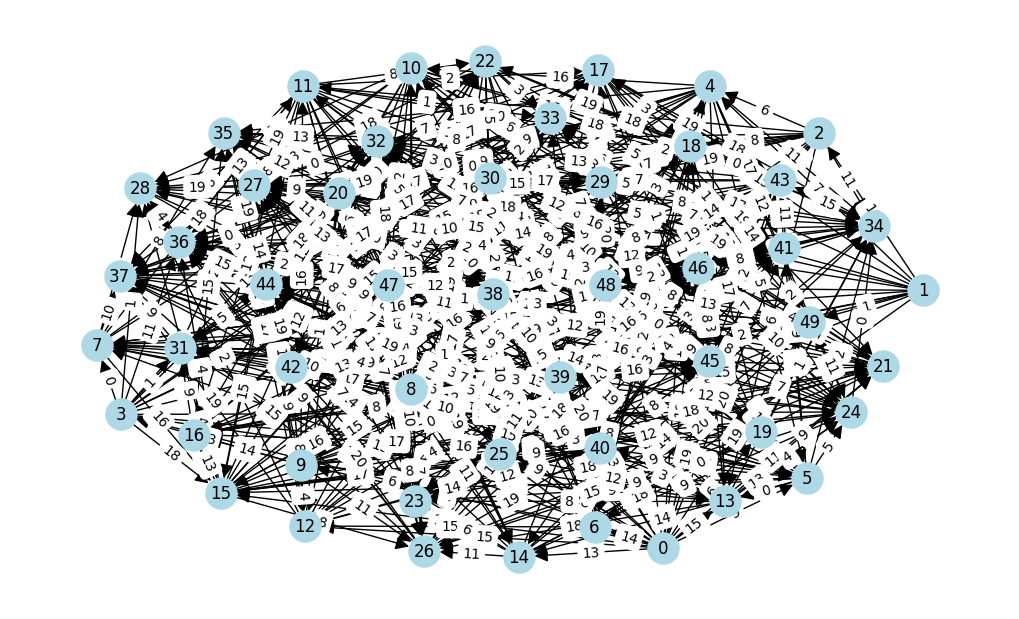

In [13]:
G = gnp_random_connected_graph(50, 0.4, True, True)

## Bellman-Ford algorithm

In [14]:
from networkx.algorithms import bellman_ford_predecessor_and_distance

In [15]:
# pred is a dictionary of predecessors, dist is a dictionary of distances
edges = list(G.edges(data=True))
print(edges)
try:
    pred, dist = bellman_ford_predecessor_and_distance(G, 0)
    for k, v in dist.items():
        print(f"Distance to {k}:", v)
except:
    print("Negative cycle detected")

[(0, 47, {'weight': 5}), (0, 3, {'weight': 6}), (0, 5, {'weight': 9}), (0, 6, {'weight': 14}), (0, 7, {'weight': 13}), (0, 8, {'weight': 9}), (0, 12, {'weight': 15}), (0, 13, {'weight': 15}), (0, 14, {'weight': 13}), (0, 15, {'weight': 19}), (0, 17, {'weight': 16}), (0, 18, {'weight': 10}), (0, 19, {'weight': 6}), (0, 21, {'weight': 11}), (0, 24, {'weight': 13}), (0, 25, {'weight': 18}), (0, 27, {'weight': 10}), (0, 36, {'weight': 7}), (0, 39, {'weight': 3}), (0, 40, {'weight': 3}), (0, 41, {'weight': 20}), (0, 43, {'weight': 2}), (0, 45, {'weight': 19}), (0, 46, {'weight': 19}), (0, 49, {'weight': 19}), (1, 49, {'weight': 1}), (1, 2, {'weight': 18}), (1, 4, {'weight': 7}), (1, 6, {'weight': 9}), (1, 7, {'weight': 15}), (1, 8, {'weight': 20}), (1, 16, {'weight': 8}), (1, 17, {'weight': 15}), (1, 25, {'weight': 18}), (1, 27, {'weight': 14}), (1, 32, {'weight': 18}), (1, 33, {'weight': 17}), (1, 35, {'weight': 16}), (1, 39, {'weight': 2}), (1, 47, {'weight': 4}), (2, 18, {'weight': 8}), 

## Floyd-Warshall algorithm

In [16]:
from networkx.algorithms import floyd_warshall_predecessor_and_distance

In [17]:
# pred is a dictionary of predecessors, dist is a dictionary of distances dictionaries
try:
    pred, dist = floyd_warshall_predecessor_and_distance(G) 
    for k, v in dist.items():
        print(f"Distances with {k} source:", dict(v))
except:
    print("Negative cycle detected")

Distances with 0 source: {0: 0, 47: 5, 3: 6, 5: 9, 6: 14, 7: 6, 8: 9, 12: 15, 13: 9, 14: 13, 15: 19, 17: 14, 18: 9, 19: 6, 21: 11, 24: 13, 25: 18, 27: 9, 36: 7, 39: 3, 40: 3, 41: 10, 43: 2, 45: 4, 46: 6, 49: 9, 1: inf, 2: inf, 4: 31, 9: 18, 10: 17, 11: 12, 16: 24, 20: 14, 22: 18, 23: 17, 26: 16, 28: 7, 29: 9, 30: 10, 31: 7, 32: 9, 33: 12, 34: 10, 35: 6, 37: 13, 38: 17, 42: 10, 44: 6, 48: 8}
Distances with 1 source: {1: 0, 49: 1, 2: 18, 4: 7, 6: 9, 7: 15, 8: 20, 16: 8, 17: 14, 25: 13, 27: 12, 32: 10, 33: 9, 35: 5, 39: 2, 47: 4, 0: inf, 3: 16, 5: 12, 9: 13, 10: 23, 11: 15, 12: 17, 13: 7, 14: 22, 15: 23, 18: 12, 19: 14, 20: 14, 21: 16, 22: 11, 23: 15, 24: 11, 26: 20, 28: 17, 29: 12, 30: 13, 31: 14, 34: 8, 36: 10, 37: 10, 38: 17, 40: 7, 41: 12, 42: 9, 43: 10, 44: 5, 45: 7, 46: 10, 48: 8}
Distances with 2 source: {2: 0, 18: 8, 4: 6, 11: 7, 13: 6, 14: 4, 23: 10, 28: 19, 29: 19, 30: 9, 32: 1, 34: 6, 36: 9, 37: 9, 40: 1, 43: 4, 46: 4, 48: 3, 0: inf, 1: inf, 3: 27, 5: 11, 6: 20, 7: 20, 8: 19, 9

## Some useful explanations

### How to get list of edges for your algorithm

In [18]:
edges = list(G.edges()) # by default G.edges are EdgesView class

In [19]:
edges[:5]

[(0, 47), (0, 3), (0, 5), (0, 6), (0, 7)]

### To get edges with weights

In [20]:
edges = list(G.edges(data=True))

In [21]:
edges[:5]

[(0, 47, {'weight': 5}),
 (0, 3, {'weight': 6}),
 (0, 5, {'weight': 9}),
 (0, 6, {'weight': 14}),
 (0, 7, {'weight': 13})]

In [22]:
nodes = list(G.nodes())
print(nodes)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


## Example on time measuring

Read more on this: https://realpython.com/python-timer/

Recall that you should measure times for 5, 10, 20, 50, 100, 200, 500 nodes 1000 times (and take mean of time taken for each node amount).

Then you should build the plot for two algorithms (x - data size, y - mean time of execution).

In [23]:
import time
from tqdm import tqdm
import bellman_ford


In [24]:
NUM_OF_ITERATIONS=100
def count_time(function, size):
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        try:
            function(G, 0)
        except:
            pass
        end = time.time()

        time_taken += end - start

    return time_taken / NUM_OF_ITERATIONS

NUM_OF_ITERATIONS=100
def count_time_def(function, size):
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        try:
            function(G)
        except:
            pass
        end = time.time()

        time_taken += end - start

    return time_taken / NUM_OF_ITERATIONS

In [25]:
import matplotlib.pyplot as plt

graph_sizes = [10, 20, 50, 100, 200, 500]
#bellman_ford_mine = [count_time_def(bellman_ford.bellman_ford, size) for size in graph_sizes] # make some coffe or tea to test it :)
bellman_ford_def = [count_time(bellman_ford_predecessor_and_distance, size) for size in graph_sizes] 

plt.plot(graph_sizes, bellman_ford_mine, label='Bellman_ford (custom)')
plt.plot(graph_sizes, bellman_ford_def, label='Bellman_ford (default)')
plt.xlabel('Num of nodes')
plt.ylabel('Time taken')
plt.legend()
plt.show()


Цей код реалізує алгоритм Беллмана-Форда для знаходження найкоротших шляхів між вершинами графа, якщо граф може містити від'ємні ваги на ребрах і не містить циклів від'ємної ваги. Ось короткий опис кожної функції в коді:

1. bellman_ford(lst_edg_wei: list) -> None**: Ця функція є головною. Вона приймає список ребер графа з їх вагами та виконує алгоритм Беллмана-Форда. Після виконання алгоритму повертає словник, що містить найкоротші відстані від початкової вершини до кожної іншої вершини, а також словник, що містить попередників кожної вершини на найкоротшому шляху.

2. relax(v1, v2, weight, d, p): Ця функція виконує процес розслаблення (relaxation) ребра графа. Якщо знаходиться коротший шлях від початкової вершини до вершини `v2` через вершину `v1`, то оновлюється відстань і попередник вершини `v2`.

3. initialize_source(vertices, start_v=0): Ця функція ініціалізує вихідні значення для алгоритму. Вона створює словник `shortest_distance`, в якому ключами є вершини графа, а значеннями - відстані від початкової вершини до них. Також створює словник `predecessor`, в якому ключами є вершини графа, а значеннями - списки попередників кожної вершини на шляху до неї.

Наш код повільніший, можливо, через те, що він не використовує вбудованих бібліотек, що допомогло б в оптимізації, ще через те що алгоритм проходить (n-1)-ну кількість разів по графі і робить релаксацію поки можливо, також ходячи по ньому, і завершальна фор конструкція перевіряє також на негативний цикл граф, що також зменшує оптимізованість коду

Алгоритм Краскала

Це функція, яка реалізує алгоритм Краскала.

Ініціалізується порожній список res для зберігання ребер остовного дерева і екземпляр disjoint_set класу DisjointSet для відстеження зв'язності вершин.
Ребра графу сортуються за вагою.
Для кожного ребра в відсортованому списку перевіряється, чи створить його додавання цикл у остовному дереві. Якщо ні, то ребро додається до остовного дерева, а вершини об'єднуються в disjoint_set.
Повертається список ребер остовного дерева.
Цей алгоритм гарантує знаходження мінімального остовного дерева у графі, якщо він зв'язаний і неорієнтований.

In [26]:
import time
from tqdm import tqdm
import kruskal

[(0, 1, {'weight': 1}), (1, 2, {'weight': 2}), (1, 5, {'weight': 2}), (5, 6, {'weight': 3}), (4, 5, {'weight': 5}), (3, 4, {'weight': 8})]


In [27]:
NUM_OF_ITERATIONS=100
def count_time(function, size):
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        function(G.edges(data=True))
        end = time.time()

        time_taken += end - start

    return time_taken / NUM_OF_ITERATIONS

NUM_OF_ITERATIONS=100
def count_time_default(function, size):
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        function(G)
        end = time.time()

        time_taken += end - start

    return time_taken / NUM_OF_ITERATIONS

 12%|█▏        | 12/100 [00:00<00:00, 111.75it/s]

100%|██████████| 100/100 [00:22<00:00,  4.37it/s]


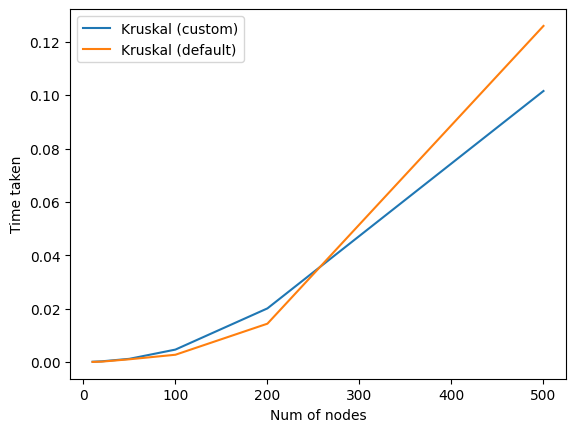

In [28]:
def kruskal_def(G):
    return tree.minimum_spanning_tree(G, algorithm="kruskal")

graph_sizes = [10, 20, 50, 100, 200, 500]
kruskal_mine = [count_time(kruskal.kruskal, size) for size in graph_sizes]
kruskal_defined = [count_time_default(kruskal_def, size) for size in graph_sizes]
plt.clf()
plt.plot(graph_sizes, kruskal_mine, label='Kruskal (custom)')
plt.plot(graph_sizes, kruskal_defined, label='Kruskal (default)')
plt.xlabel('Num of nodes')
plt.ylabel('Time taken')
plt.legend()
plt.show()

## Floyd Worshall algorithm

Ця функція використовує алгоритм Флойда-Уоршелла для обчислення найкоротших відстаней між усіма парами вершин у графі.

Ініціалізується порожній словник res, який буде містити результати - найкоротші відстані між усіма парами вершин.
Спочатку створюється матриця суміжності adj_matrix за допомогою функції adjacency_matrix.
Потім виконується потрійний вкладений цикл для оновлення відстаней між усіма парами вершин. На кожному кроці циклу обчислюється найкоротший шлях від вершини i до вершини j, використовуючи проміжну вершину k.
Результат записується у вигляді словника, де ключі - це вершини, від яких розглядається вихід, а значення - це словники, де ключі - це вершини, до яких розглядається вихід, а значення - це відстані між ними.

In [35]:
import floyd_worshall
NUM_OF_ITERATIONS=100
def count_time(function, size):
    time_taken = 0
    for _ in tqdm(range(NUM_OF_ITERATIONS)):

        G = gnp_random_connected_graph(size, 0.4, False)

        start = time.time()
        function(G)
        end = time.time()

        time_taken += end - start

    return time_taken / NUM_OF_ITERATIONS

100%|██████████| 100/100 [00:00<00:00, 2872.32it/s]


100%|██████████| 100/100 [00:01<00:00, 60.24it/s]


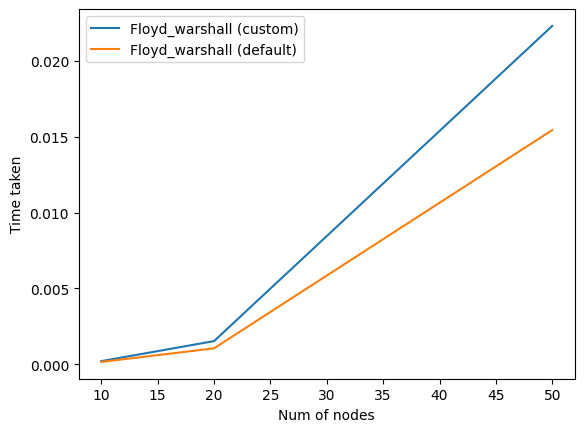

In [37]:
graph_sizes = [10, 20, 50]
warshall_mine = [count_time(floyd_worshall.floyd_worshall, size) for size in graph_sizes] 
warshall_def = [count_time(floyd_warshall_predecessor_and_distance, size) for size in graph_sizes]  

plt.plot(graph_sizes, warshall_mine, label='Floyd_warshall (custom)')
plt.plot(graph_sizes, warshall_def, label='Floyd_warshall (default)')
plt.xlabel('Num of nodes')
plt.ylabel('Time taken')
plt.legend()
plt.show()